In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
fastai.__version__

'1.0.57'

In [3]:
from fastai.metrics import accuracy
from fastai.torch_core import *
from fastai_audio import *

from fastai.vision import models, ClassificationInterpretation

In [11]:
DATA = Path('../data')
NSYNTH_AUDIO = DATA/'lid' # contains train and valid folders

In [5]:
n_fft = 1024 # output of fft will have shape [513 x n_frames]
n_hop = 256  # 75% overlap between frames
n_mels = 40 # compress 513 dimensions to 40 via mel frequency scale
sample_rate = 16000

tfms = get_frequency_batch_transforms(n_fft=n_fft, n_hop=n_hop,
                                      n_mels=n_mels, sample_rate=sample_rate)

In [12]:
for f in NSYNTH_AUDIO.glob("*/*.wav"):
    print(f)

../data/lid/german/Werder Spezial_2.wav
../data/lid/german/Werder Spezial_3.wav
../data/lid/german/Werder Spezial_1.wav
../data/lid/german/Werder Spezial_0.wav
../data/lid/german/Werder Spezial_4.wav
../data/lid/german/Werder Spezial_5.wav
../data/lid/german/Werder Spezial_6.wav
../data/lid/english/Men in Blazers 06_22_18_4.wav
../data/lid/english/Men in Blazers 06_22_18_5.wav
../data/lid/english/Men in Blazers 06_22_18_2.wav
../data/lid/english/Men in Blazers 06_22_18_3.wav
../data/lid/english/Men in Blazers 06_22_18_1.wav
../data/lid/english/Men in Blazers 06_22_18_0.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insana-e-e40a86a128b9b_5.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insana-e-e40a86a128b9b_4.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insana-e-e40a86a128b9b_0.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insana-e-e40a86a128b9b_1.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insana-e-e40a86a128b9b_3.wav
../data/lid/portuguese/-42---Uma-Free-Agency-insan

In [17]:
batch_size = 2

instrument_family_pattern = r'.*/(\w+)/.*.wav$'

data = (AudioItemList
            .from_folder(NSYNTH_AUDIO)
            .split_by_rand_pct(0.5)
            .label_from_re(instrument_family_pattern)
            .databunch(bs=batch_size, dl_tfms=tfms))

In [18]:
data.c, data.classes

(4, ['english', 'german', 'portuguese', 'spanish'])

In [19]:
xs, ys = data.one_batch()
xs.shape, ys.shape

RuntimeError: fft: ATen not compiled with MKL support

In [9]:
xs.min(), xs.max(), xs.mean(), xs.std()

(tensor(0.1436), tensor(1.), tensor(0.3467), tensor(0.1946))

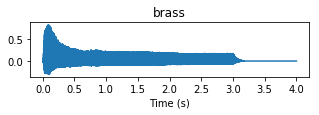

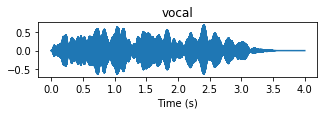

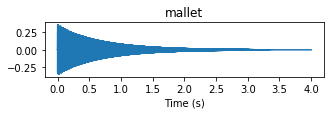

In [10]:
data.show_batch(3)

In [11]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(3)

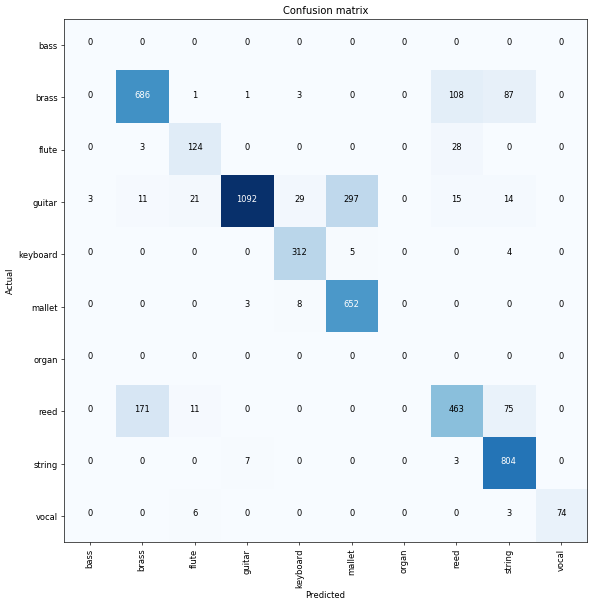

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=60)

In [13]:
interp.most_confused(min_val=20)

[('guitar', 'mallet', 297),
 ('reed', 'brass', 171),
 ('brass', 'reed', 108),
 ('brass', 'string', 87),
 ('reed', 'string', 75),
 ('guitar', 'keyboard', 29),
 ('flute', 'reed', 28),
 ('guitar', 'flute', 21)]